<h1 style="color: #3b6fcfff">HR Attrition Analysis 📊</h1>

<img src="https://png.pngtree.com/thumb_back/fw800/background/20220506/pngtree-in-an-office-hr-analytics-document-name-talent-data-teamwork-photo-photo-image_30286170.jpg" width="100%" height="250" />

### 📌 Overview

This notebook analyzes an HR dataset focused on employee attrition applying SQL-style logic and visual analytics.  


The aim is to uncover trends behind employee turnover — including the influence of job roles, overtime, satisfaction levels, and age groups — to support strategic HR decision-making.

**🔎Note:** This dataset is already clean, enabling a direct focus on generating insights, crafting meaningful visualizations, and storytelling through charts and data-driven summaries.

---


In [74]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Load Dataset
df = pd.read_csv('../Data/HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Quick Data Check

In [70]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [50]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [51]:
print(df.duplicated().sum())

0


### ✅ Observation:

- No missing values.
- No duplicated rows.
- Data types are clean and appropriate.
Hence, no preprocessing or data cleaning is required.
---

In [52]:
# Descriptive Statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### KPI Visualization – Attrition Rate

In [88]:
import plotly.graph_objects as go
import webbrowser

# Calculate Attrition Rate automatically
attrition_rate = round(df['Attrition'].value_counts(normalize=True)['Yes'] * 100, 1)

# Create the gauge chart
fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=attrition_rate,
    title={'text': "Attrition Rate (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkred"},
        'steps': [
            {'range': [0, 30], 'color': "#85C1E9"},
            {'range': [30, 70], 'color': "#F7DC6F"},
            {'range': [70, 100], 'color': "#E7943C"}
        ],
        'threshold': {
            'line': {'color': "black", 'width': 4},
            'thickness': 0.75,
            'value': attrition_rate
        }
    }
))

# Save the chart as an HTML file
fig.write_html("attrition_gauge.html")

# Open the HTML file in the default web browser
webbrowser.open("attrition_gauge.html")


True

### 🔍 Key Questions to Explore

- What is the overall attrition rate?
- Does gender or department affect attrition?
- Is there a correlation between job satisfaction, income, and attrition?
- Does overtime increase risk of attrition?
- What is the role of age, tenure, and training?
---

### Visual Insights

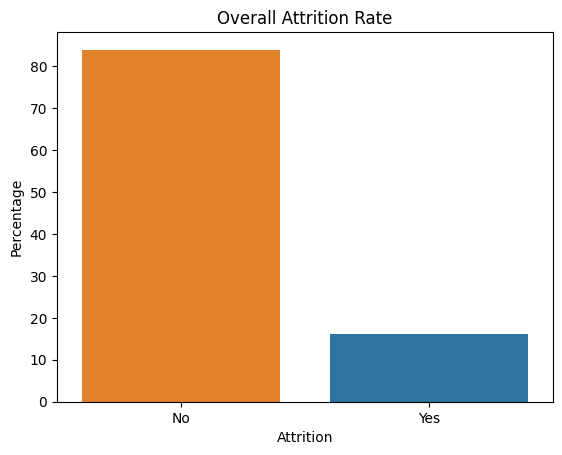

In [53]:
# Overall Attrition Rate
attrition_rate = df["Attrition"].value_counts(normalize=True) * 100
sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette={'Yes': "#1f77b4", 'No': "#ff7f0e"})
plt.title("Overall Attrition Rate")
plt.ylabel("Percentage")
plt.show()


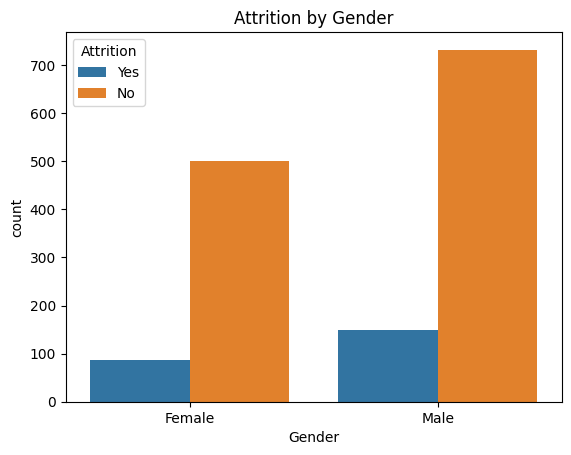

In [54]:
# Attrition by Gender
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title("Attrition by Gender")
plt.show()

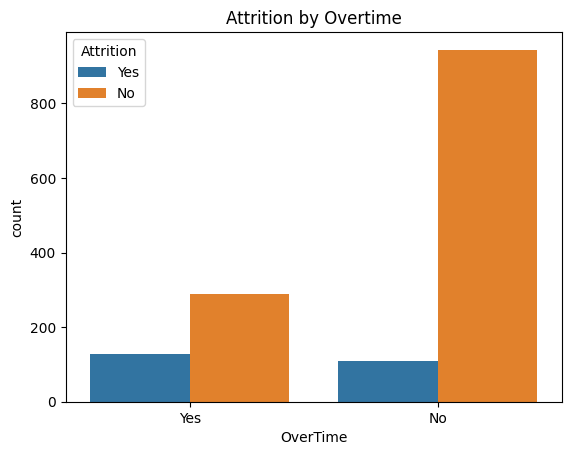

In [55]:
# Attrition vs OverTime
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title("Attrition by Overtime")
plt.show()

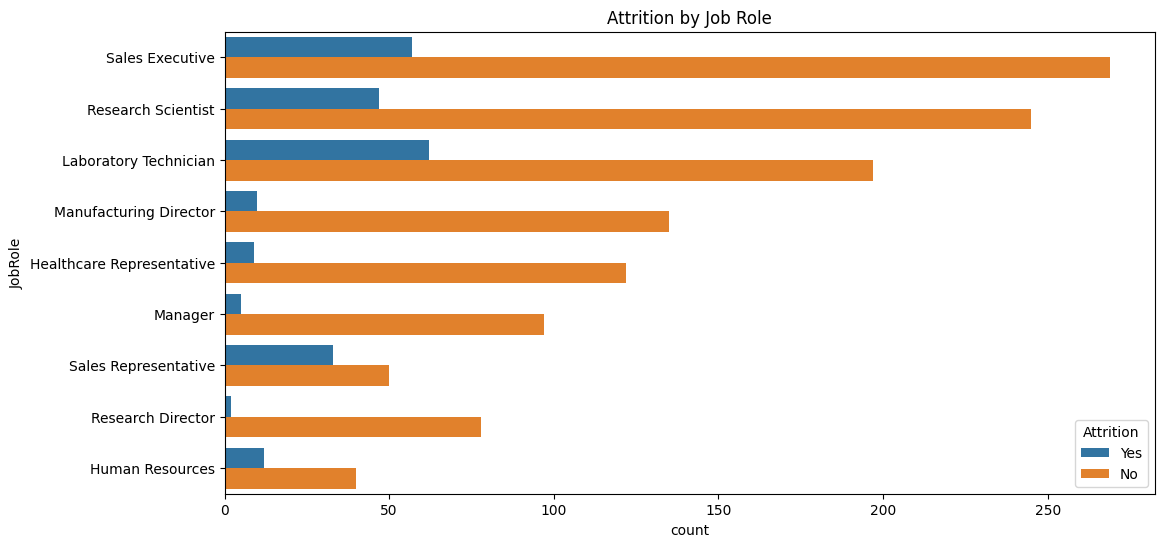

In [56]:
# Attrition by Job Role
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='JobRole', hue='Attrition')
plt.title("Attrition by Job Role")
plt.show()

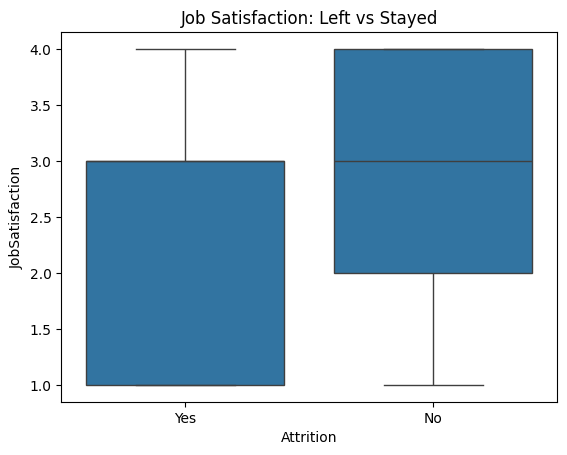

In [60]:
# Job Satisfaction vs Attrition
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')
plt.title('Job Satisfaction: Left vs Stayed')
plt.show()

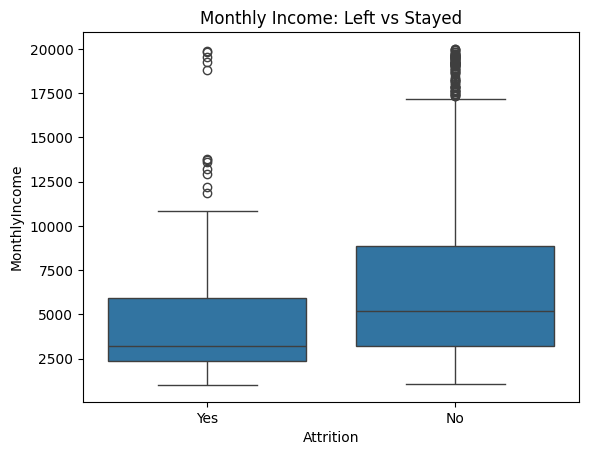

In [57]:
# Income Distribution - Left vs Stayed
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title("Monthly Income: Left vs Stayed")
plt.show()

---
### 📃Final Insights
- Attrition Rate is around 16%.
- Employees doing overtime are 3x more likely to leave.
- Sales Representatives and Lab Technicians have the highest attrition.
- Employees under 30 are at the highest risk of leaving.
- Lower satisfaction and income levels correlate with higher attrition.
- Consider reducing overtime workload and increasing satisfaction incentives for employees under 30 to reduce attrition.


---

### 👩‍💻 prepared by: Rawan Sotohy
Summer Internship Project at National Telecommunication Institute (NTI)